<a href="https://colab.research.google.com/github/Taejin1221/Lab_Experiment/blob/main/Trajectory_Clustering/Trajectory_Clustering_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load modules and Set constants

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, cv2, glob
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
WIDTH, HEIGHT = 256, 256
CROP_WIDTH, CROP_HEIGHT = 32, 32
CONCAT_WIDTH, CONCAT_HEIGHT = CROP_WIDTH + CROP_WIDTH, CROP_HEIGHT
CROP_IMAGE_NUMBER = (WIDTH // CROP_WIDTH) * (HEIGHT // CROP_HEIGHT)

EXPERIMENT_DATA = {
    'name' : 'Trajectory_Clusetring',
    'number' : '29',
    'date' : '07-11-2021',
    'description' : 'Calculate similarity of original trajectory using DNN\n'
    }

ROOT_DIR = os.path.join('/content')

DATA_DIR = os.path.join(ROOT_DIR, 'Image_Files')

EXPERIMENT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', 'University', 'PiLab', 'Experiment')
RESULT_DIR = os.path.join(EXPERIMENT_DIR, 'Results')

os.chdir(RESULT_DIR)
curr_result_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}_{EXPERIMENT_DATA['date']}_Data"
if (curr_result_name not in os.listdir()):
    os.mkdir(curr_result_name)

CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_name)
os.chdir(CURR_RESULT_DIR)

with open('Description.txt', 'w') as f:
    f.write(EXPERIMENT_DATA['description'])

print(f'ROOT_DIR:        {ROOT_DIR}')
print(f'DATA_DIR:        {DATA_DIR}')
print(f'EXPERIMENT_DIR:  {EXPERIMENT_DIR}')
print(f'RESULT_DIR:      {RESULT_DIR}')
print(f'CURR_RESULT_DIR: {CURR_RESULT_DIR}')

ROOT_DIR:        /content
DATA_DIR:        /content/Image_Files
EXPERIMENT_DIR:  /content/drive/MyDrive/University/PiLab/Experiment
RESULT_DIR:      /content/drive/MyDrive/University/PiLab/Experiment/Results
CURR_RESULT_DIR: /content/drive/MyDrive/University/PiLab/Experiment/Results/Trajectory_Clusetring_29_07-11-2021_Data


# Load Images

In [ ]:
import zipfile

os.chdir(ROOT_DIR)
zipfile.ZipFile("Image_Files.zip").extractall()

In [ ]:
os.chdir(DATA_DIR)
print(sorted(glob.glob('*png'))[:10])

['Geolife_trajectory1.png', 'Geolife_trajectory10.png', 'Geolife_trajectory100.png', 'Geolife_trajectory1000.png', 'Geolife_trajectory10000.png', 'Geolife_trajectory10001.png', 'Geolife_trajectory10002.png', 'Geolife_trajectory10003.png', 'Geolife_trajectory10004.png', 'Geolife_trajectory10005.png']


<Figure size 432x288 with 0 Axes>

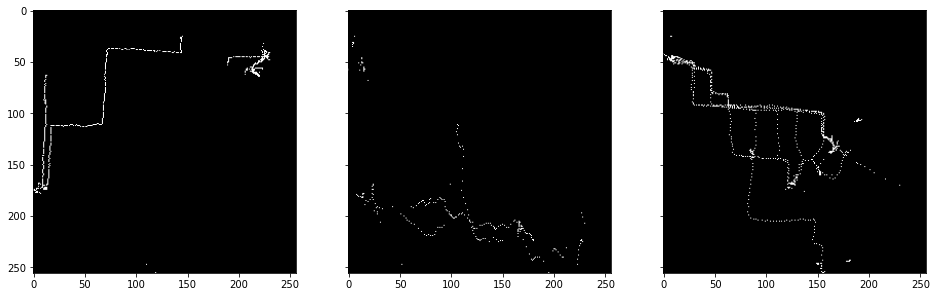

In [ ]:
os.chdir(DATA_DIR)

file_names = list(sorted(glob.glob('*png')))

original_images = [ ]
for file in file_names:
    original_images.append(cv2.imread(file, cv2.IMREAD_GRAYSCALE))

plt.gray()
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (16, 48))
ax[0].imshow(original_images[0])
ax[1].imshow(original_images[1])
ax[2].imshow(original_images[2])

plt.show()

<Figure size 432x288 with 0 Axes>

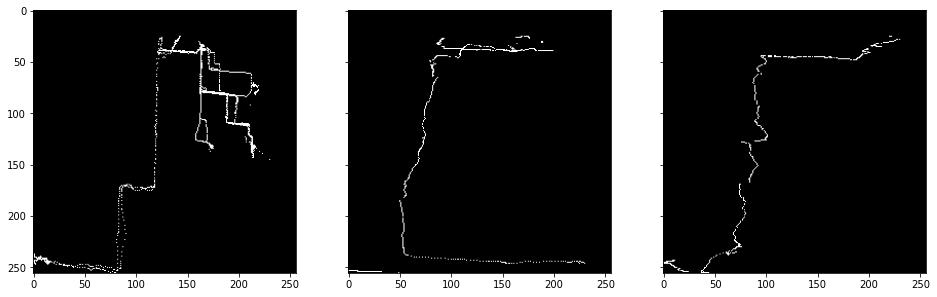

In [ ]:
plt.gray()
fig, ax = plt.subplots(1, 3, sharex = True, sharey = True, figsize = (16, 48))
ax[0].imshow(original_images[3])
ax[1].imshow(original_images[4])
ax[2].imshow(original_images[5])

plt.show()

In [ ]:
len(original_images)

18670

In [ ]:
print(original_images[0].shape)

(256, 256)


In [ ]:
cropped_images = [ ]
for image in original_images[:1000]:
    for i in range(0, HEIGHT, CROP_HEIGHT):
        for j in range(0, WIDTH, CROP_WIDTH):
            curr_image = [ ]
            for ii in range(i, i + CROP_HEIGHT):
                curr_image.append(image[ii][j : j + CROP_WIDTH])
            cropped_images.append(curr_image)

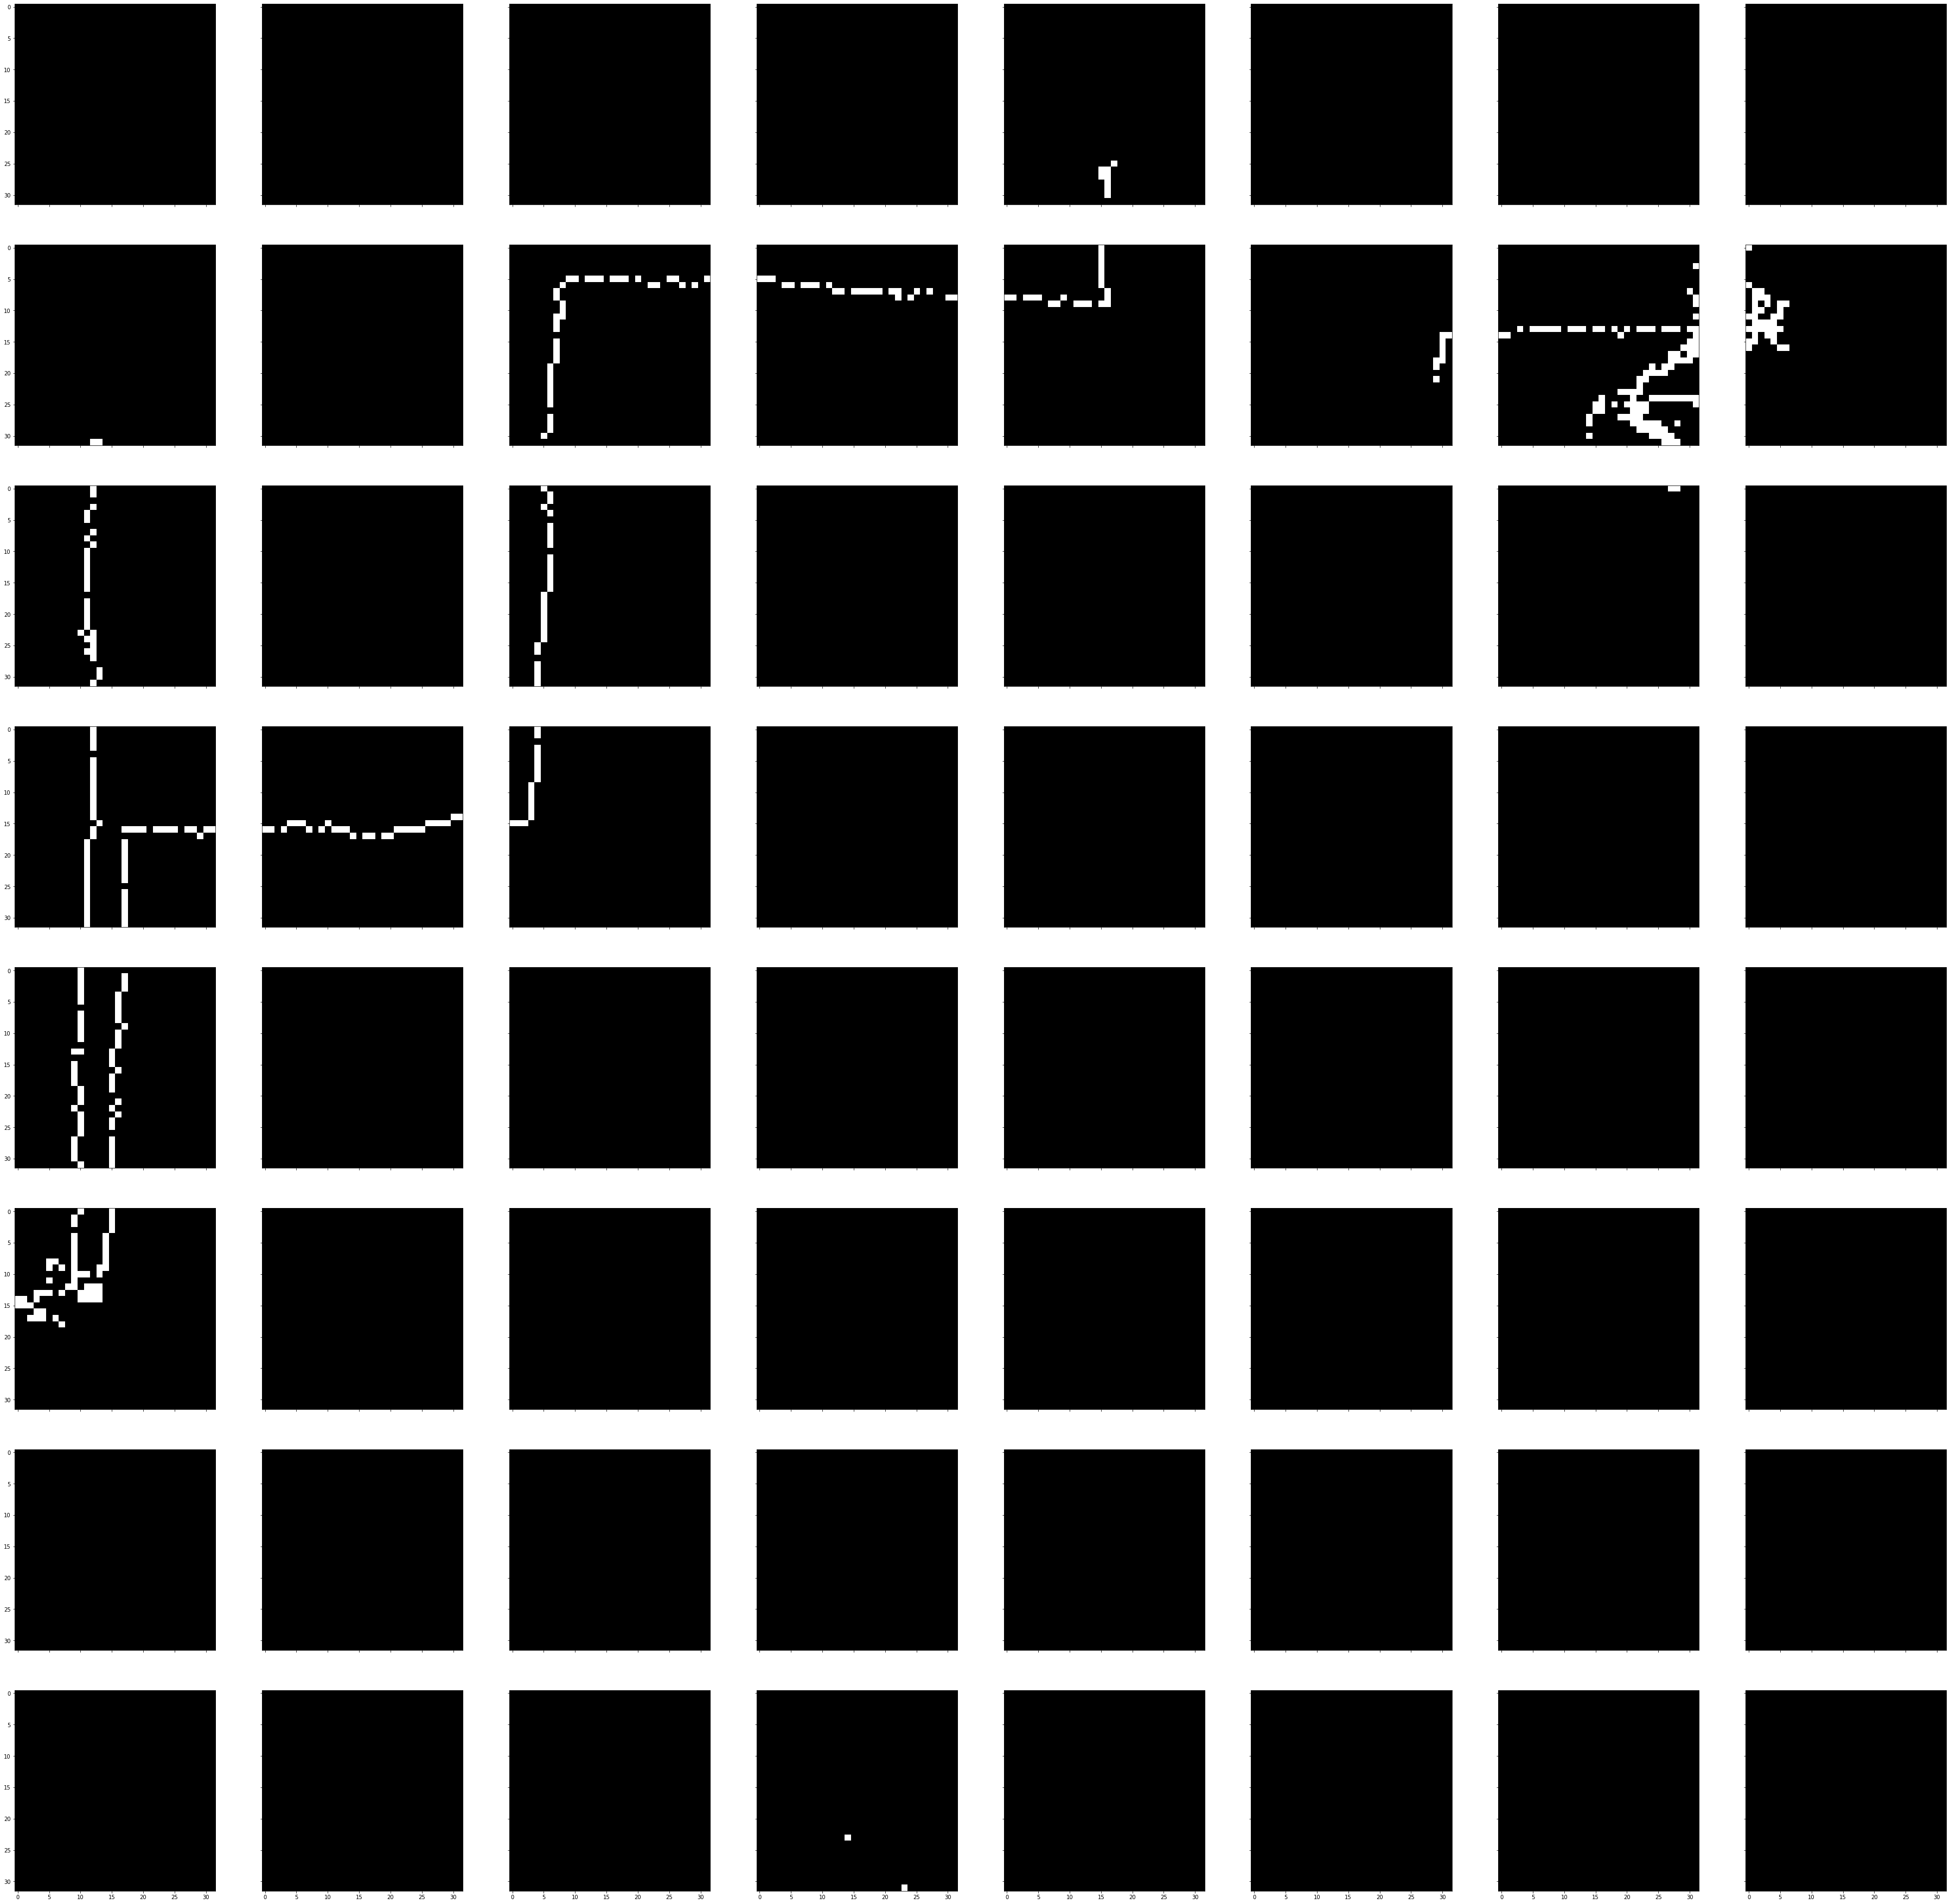

In [ ]:
row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
fig, ax = plt.subplots( row, col, True, True, figsize = ( 64, 64 ) )
for i in range( row * col ):
    ax[i // row][i % col].imshow(cropped_images[i])
plt.show()

In [ ]:
# delete all black image
cropped_images_no_black = [ ]
for img in cropped_images:
    not_zero = 0
    for i in range(CROP_HEIGHT):
        for j in range(CROP_WIDTH):
            if ( img[i][j] > 0 ):
                not_zero += 1
    
    if ( not_zero != 0 ):
        cropped_images_no_black.append( img )

In [ ]:
print(len(cropped_images))
print(len(cropped_images_no_black))

64000
15952


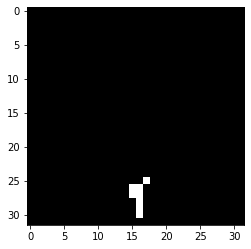

In [ ]:
plt.imshow(cropped_images_no_black[0])
plt.show()

In [ ]:
cropped_images_no_black = np.array(cropped_images_no_black)

# Create Dataset

In [ ]:
X_TRAIN_SIZE = 100
X_TEST_SIZE = 10

X_train, Y_train = [ ], [ ]
for i in range(X_TRAIN_SIZE):
    for j in range(X_TRAIN_SIZE):
        X_train.append(cv2.hconcat([cropped_images_no_black[i], cropped_images_no_black[j]]))
        if (i == j):
            Y_train.append(1)
        else:
            Y_train.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE, X_TRAIN_SIZE + X_TEST_SIZE + 10_000):
    X_train.append(cv2.hconcat([cropped_images_no_black[i], cropped_images_no_black[i]]))
    Y_train.append(1)

X_test, Y_test = [ ], [ ]
for i in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
    for j in range(X_TRAIN_SIZE, X_TRAIN_SIZE + X_TEST_SIZE):
        X_test.append(cv2.hconcat([cropped_images_no_black[i], cropped_images_no_black[j]]))
        if (i == j):
            Y_test.append(1)
        else:
            Y_test.append(0)

for i in range(X_TRAIN_SIZE + X_TEST_SIZE + 10_000, X_TRAIN_SIZE + X_TEST_SIZE + 10_000 + 100):
    X_test.append(cv2.hconcat([cropped_images_no_black[i], cropped_images_no_black[i]]))
    Y_test.append(1)

In [ ]:
print(len(X_train[0][0]))

64


In [ ]:
print(CONCAT_HEIGHT * CONCAT_WIDTH)

2048


In [ ]:
X_train = np.array(X_train).astype('float32') / 255.
X_train = np.reshape(X_train, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

X_test = np.array(X_test).astype('float32') / 255
X_test = np.reshape(X_test, (-1, CONCAT_HEIGHT * CONCAT_WIDTH))

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20000, 2048) (20000,)
(200, 2048) (200,)


# Construct Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
NEURON_NUMBER = 2048

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(NEURON_NUMBER, 'relu', input_shape = (2048, )))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(NEURON_NUMBER, 'relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_7 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)             

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, batch_size = 128)

Epoch 1/50
157/157 [==============================] - 98s 617ms/step - loss: 7.5344 - acc: 0.5049
Epoch 2/50
157/157 [==============================] - 96s 611ms/step - loss: 7.5484 - acc: 0.5050
Epoch 3/50
157/157 [==============================] - 96s 610ms/step - loss: 7.5484 - acc: 0.5050
Epoch 4/50
157/157 [==============================] - 98s 627ms/step - loss: 7.5484 - acc: 0.5050
Epoch 5/50
157/157 [==============================] - 95s 606ms/step - loss: 7.5484 - acc: 0.5050
Epoch 6/50
157/157 [==============================] - 96s 610ms/step - loss: 7.5484 - acc: 0.5050
Epoch 7/50
157/157 [==============================] - 98s 625ms/step - loss: 7.5484 - acc: 0.5050
Epoch 8/50
157/157 [==============================] - 97s 616ms/step - loss: 7.5484 - acc: 0.5050
Epoch 9/50
157/157 [==============================] - 95s 608ms/step - loss: 7.5484 - acc: 0.5050
Epoch 10/50
157/157 [==============================] - 95s 607ms/step - loss: 7.5484 - acc: 0.5050
Epoch 11/50
157/157

In [ ]:
score = model.evaluate(X_test, Y_test)
print(score)

7/7 [==============================] - 0s 3ms/step - loss: 40.3110 - acc: 0.8900
[40.31101608276367, 0.8899999856948853]


tf.Tensor([[1.]], shape=(1, 1), dtype=float32)


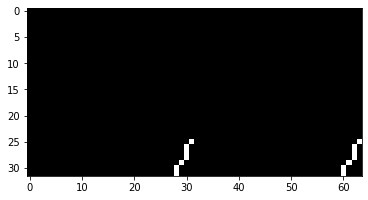

In [ ]:
print(model(X_test[0:1]))
plt.imshow(np.reshape(X_test[0:1], (CONCAT_HEIGHT, CONCAT_WIDTH)))
plt.show()

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


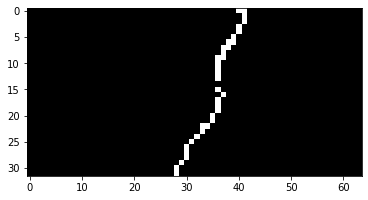

In [ ]:
print(model(X_test[1:2]))
plt.imshow(np.reshape(X_test[1:2], (CONCAT_HEIGHT, CONCAT_WIDTH)))
plt.show()

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


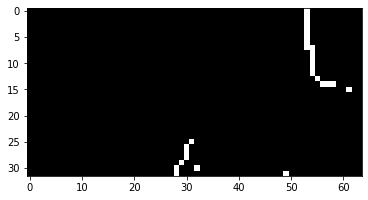

In [ ]:
test = X_test[5:6]
print(model(test))
plt.imshow(np.reshape(test, (CONCAT_HEIGHT, CONCAT_WIDTH)))
plt.show()

In [ ]:
os.chdir(CURR_RESULT_DIR)

<Figure size 432x288 with 0 Axes>

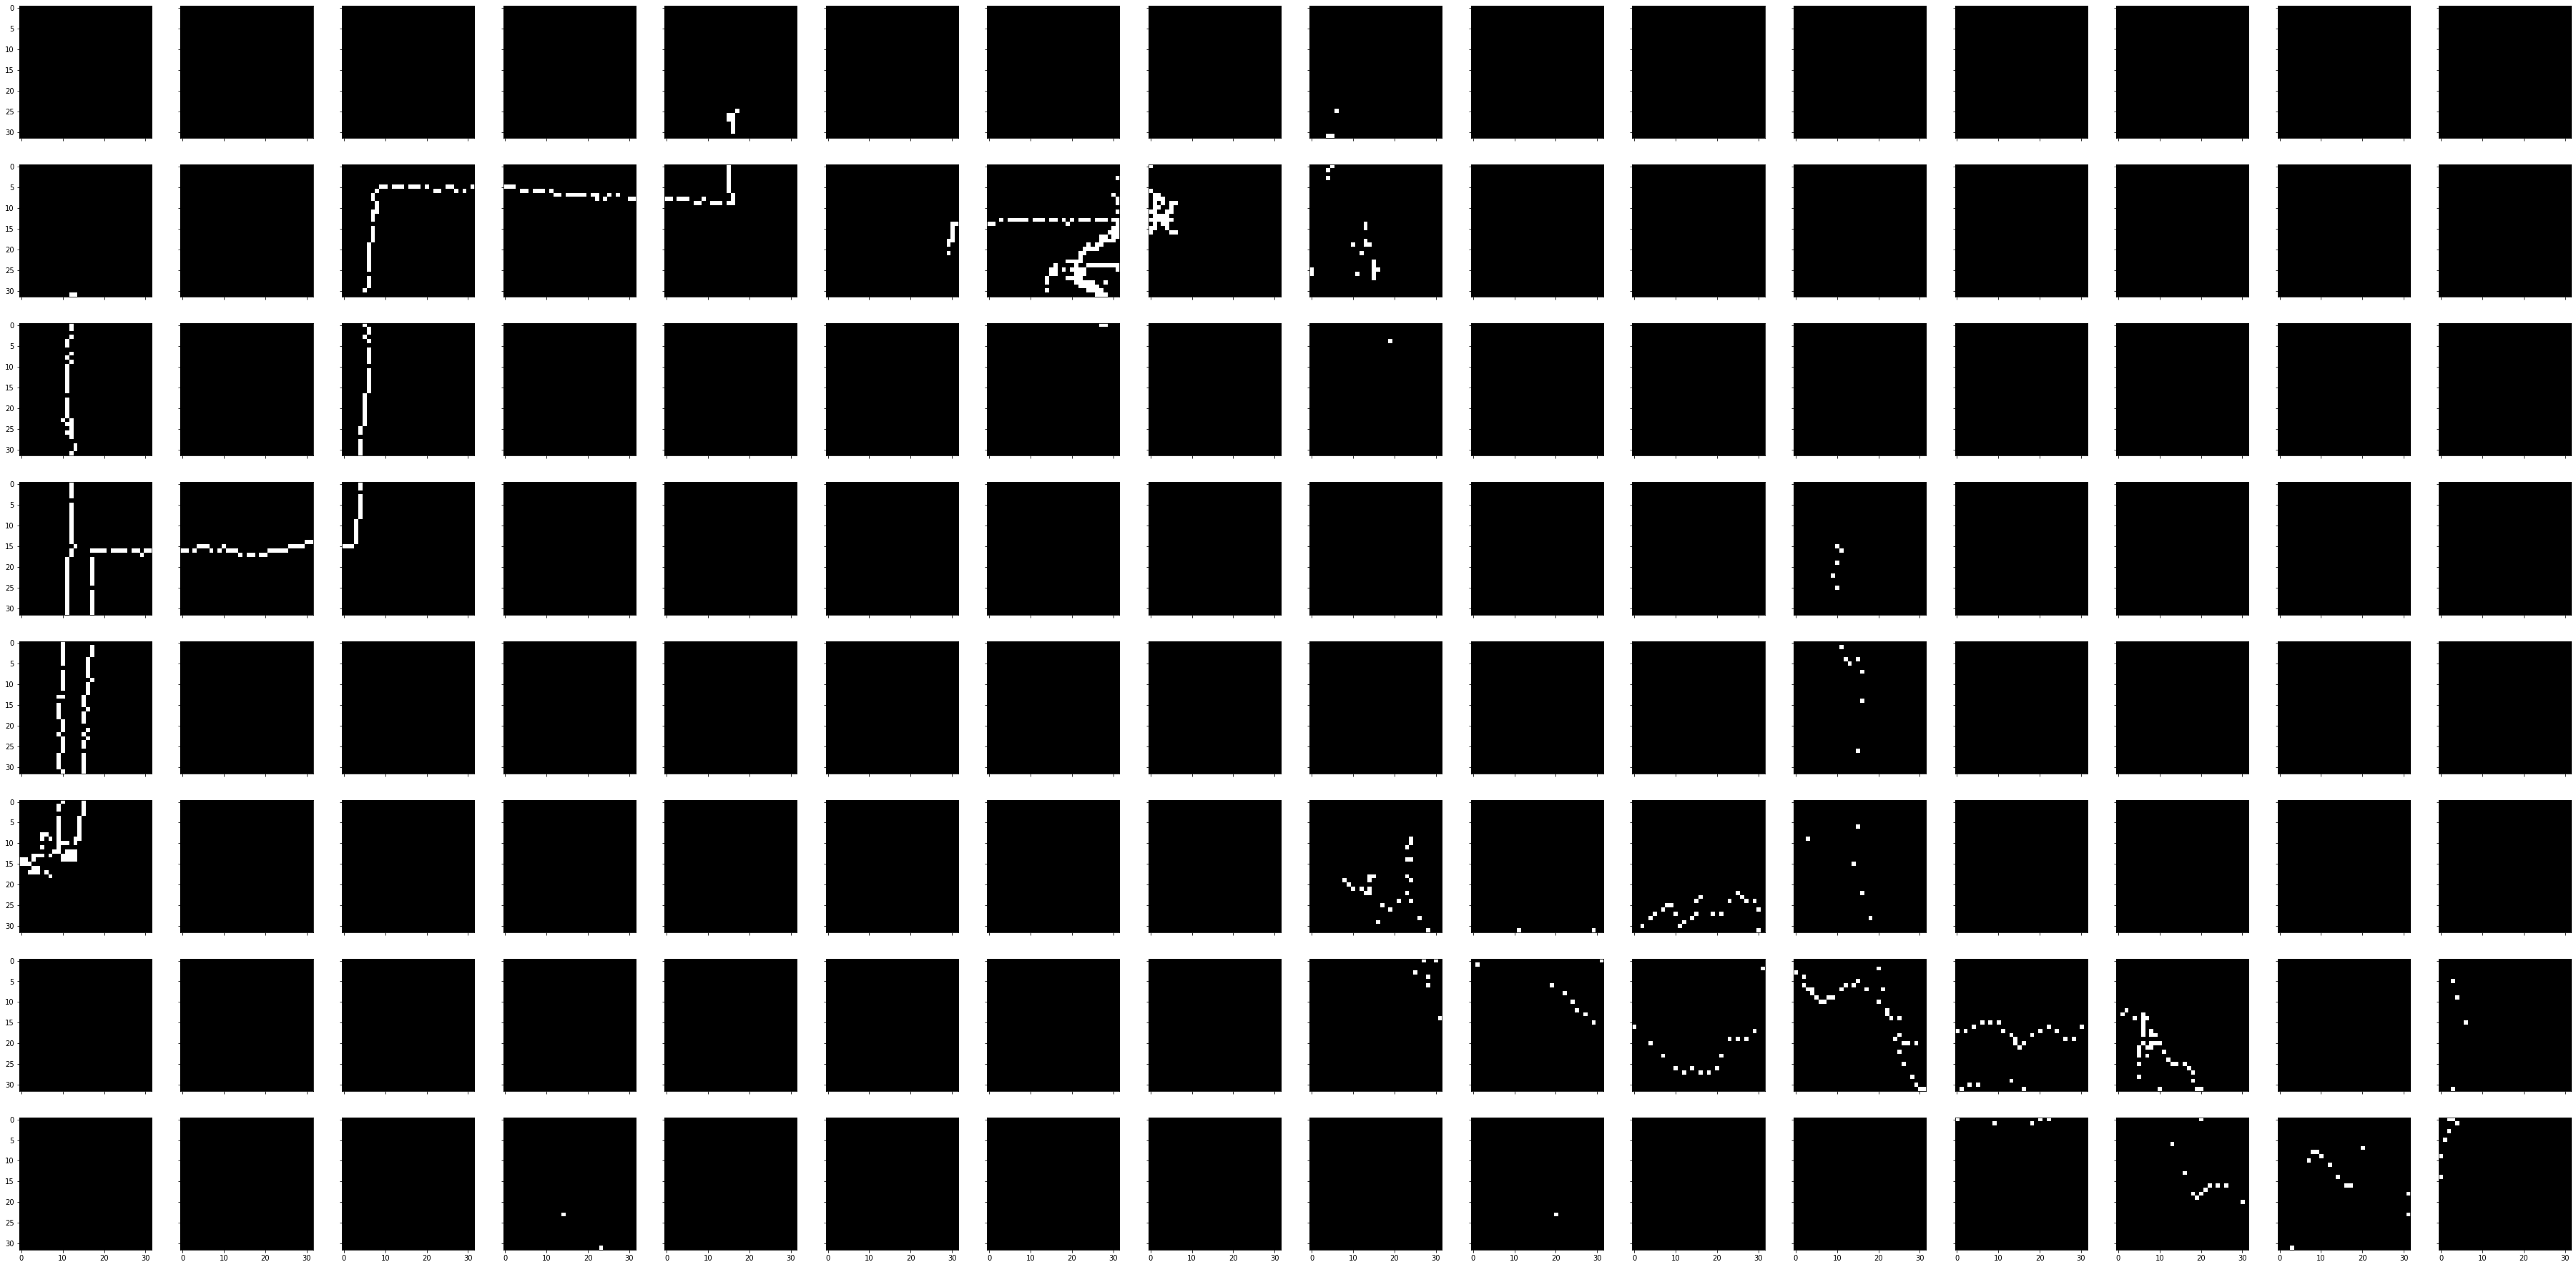

In [ ]:
plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range(n):
    i_image = np.array(cropped_images[i])
    j_image = np.array(cropped_images[64 + i])

    ax[i // 8][i % 8].imshow(i_image)
    ax[i // 8][i % 8 + 8].imshow(j_image)

plt.show()

Trajectory_Clusetring_29_Reconstruction(07-11-2021).png


<Figure size 432x288 with 0 Axes>

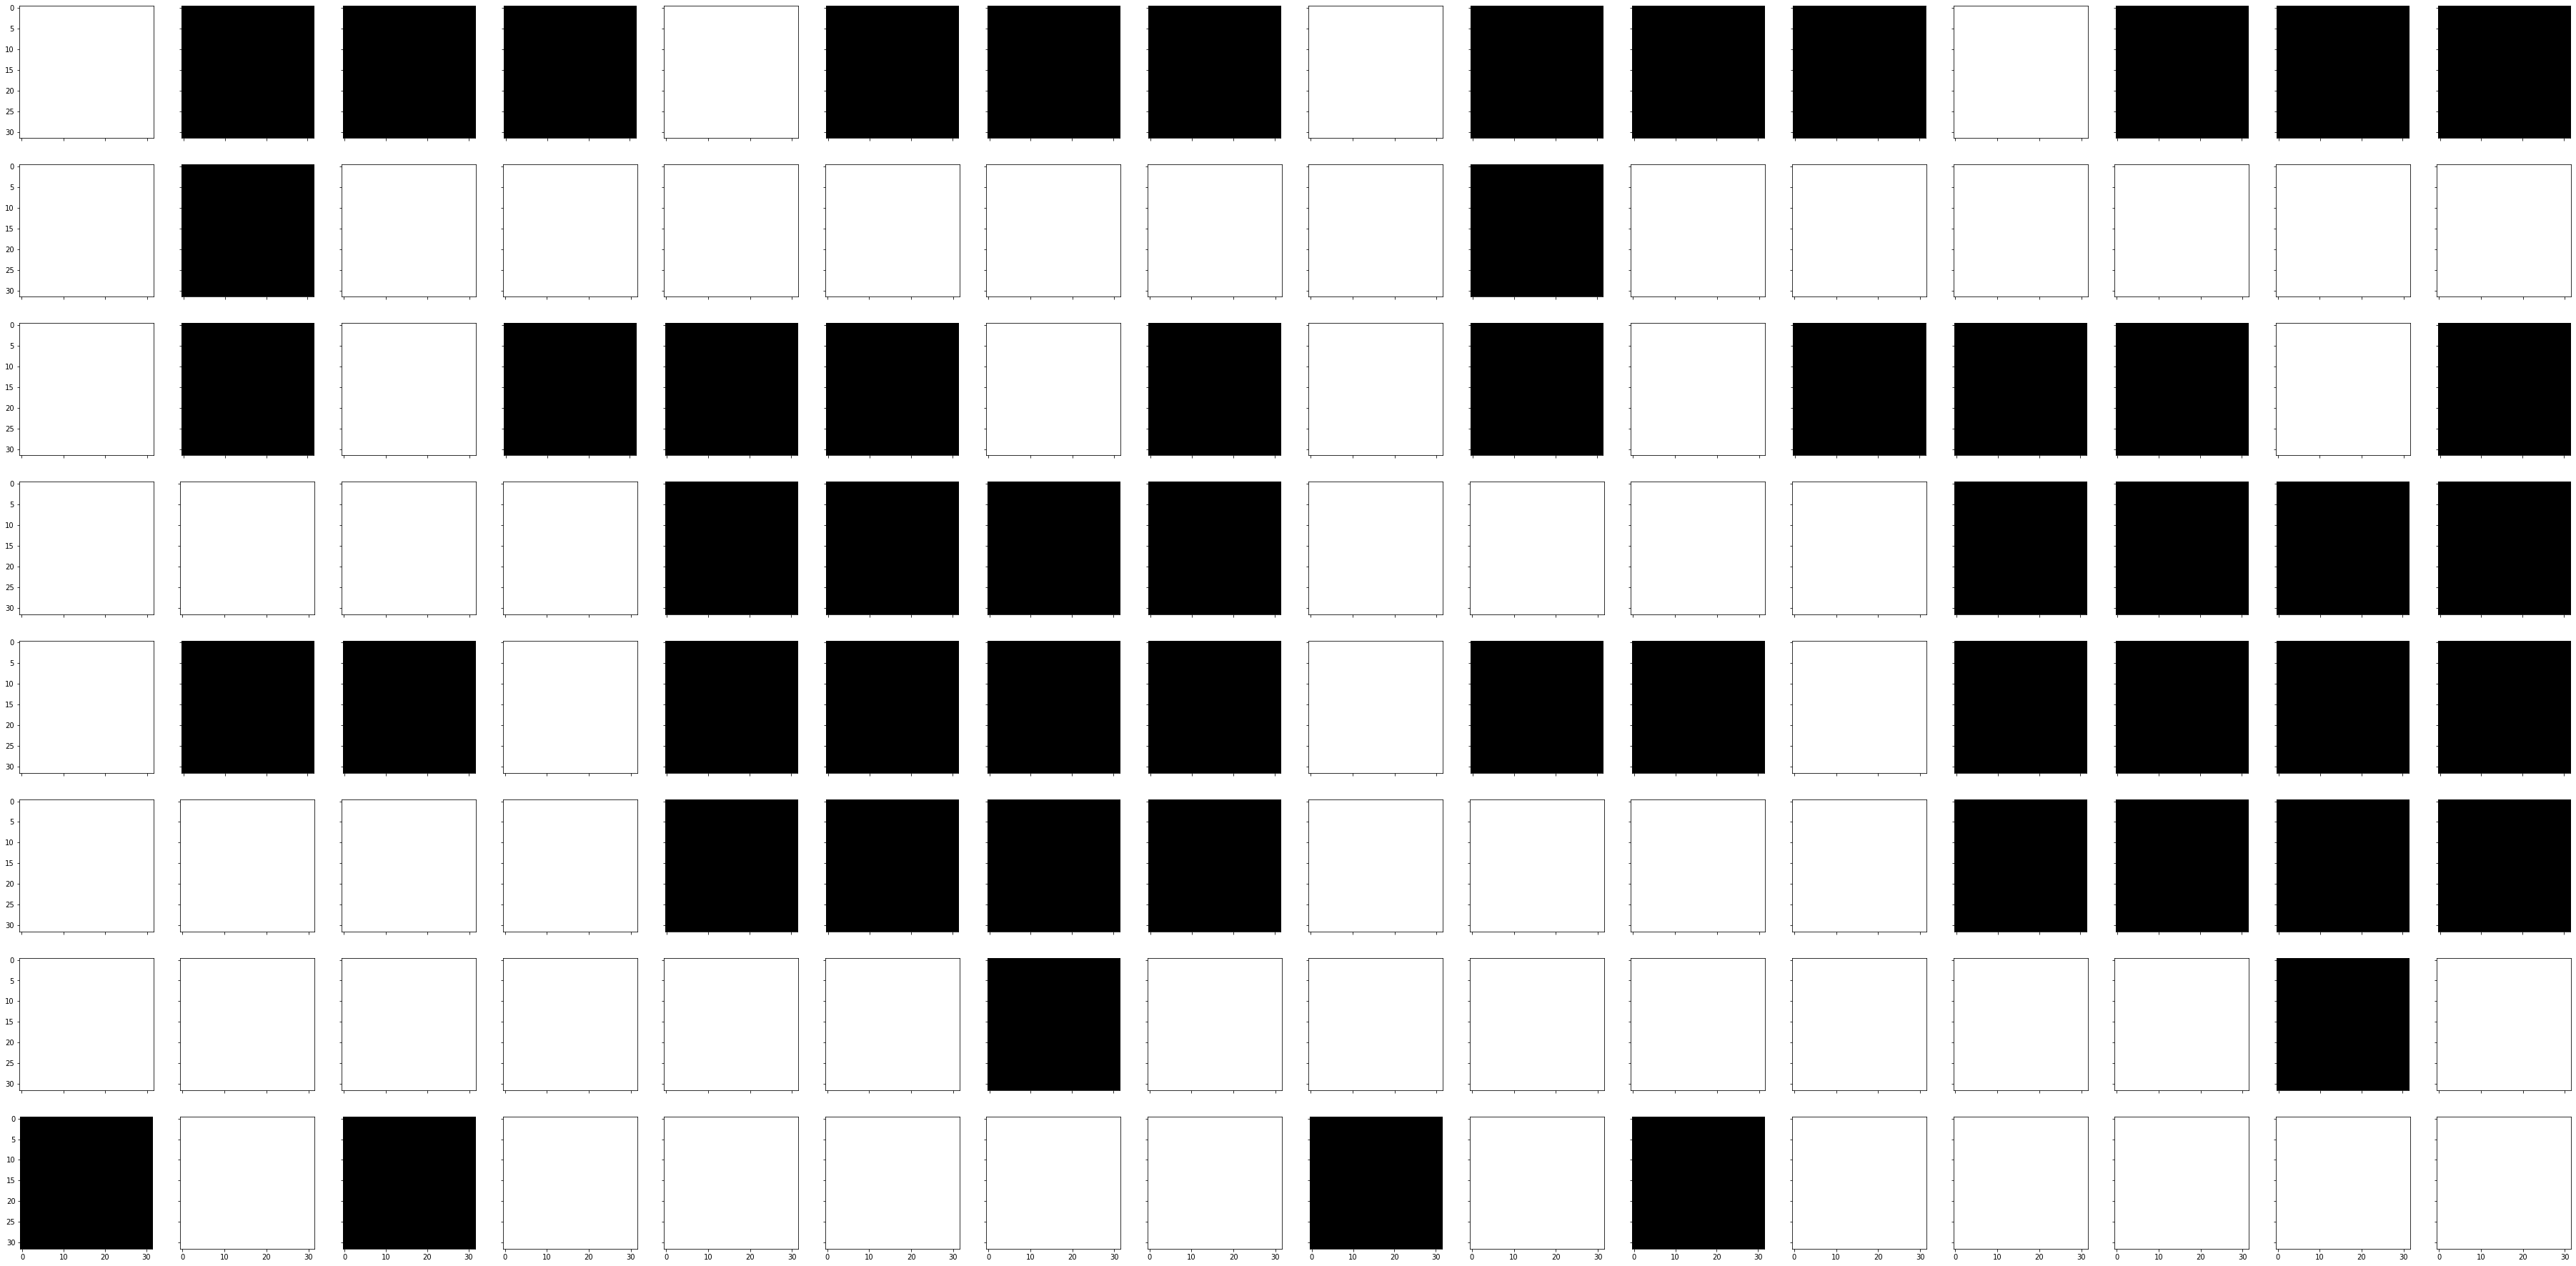

In [ ]:
plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range(n):
    i_image = np.array(cropped_images[i])
    j_image = np.array(cropped_images[64 + i])

    concat_image = cv2.hconcat([i_image, j_image])
    value = model(concat_image.reshape(-1, CONCAT_HEIGHT * CONCAT_WIDTH))[0][0]
    if (value == 1):
        ax[i // 8][i % 8].imshow(i_image)
        ax[i // 8][i % 8 + 8].imshow(j_image)

result_name = (EXPERIMENT_DATA['name'] + '_'
    + EXPERIMENT_DATA['number'] + '_'
    + 'Reconstruction' + '('
    + EXPERIMENT_DATA['date'] + ').png')
print( result_name )

plt.savefig(result_name, dpi = 100)
plt.show()

<Figure size 432x288 with 0 Axes>

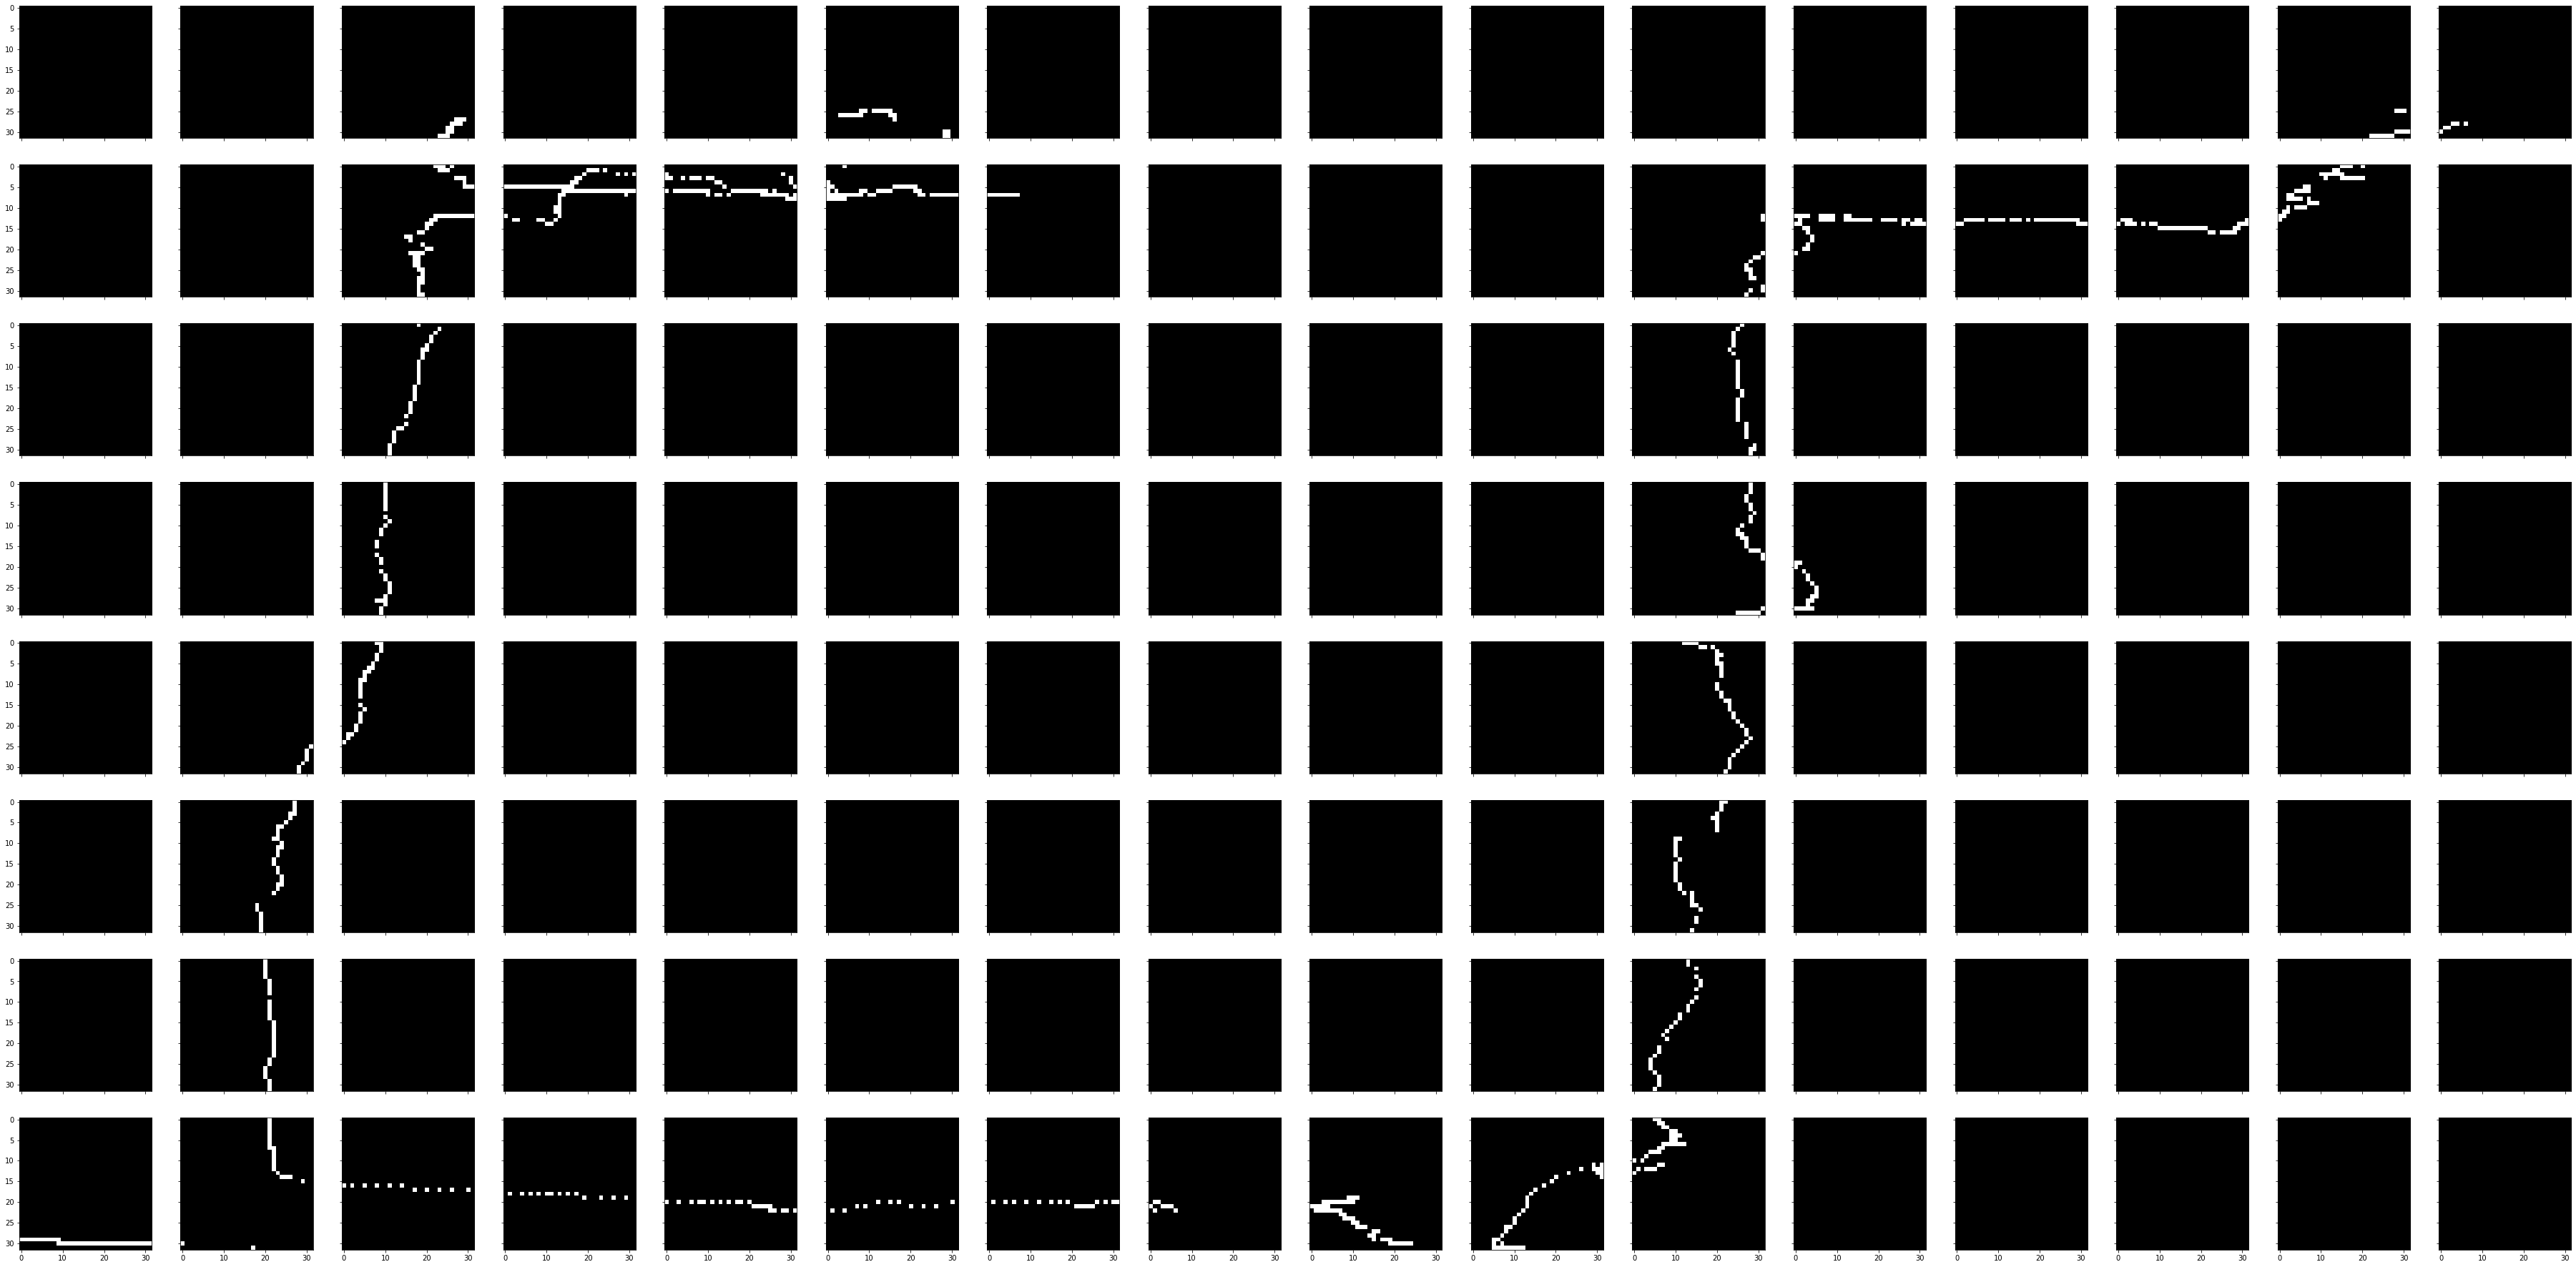

In [ ]:
plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range(n):
    i_image = np.array(cropped_images[4 * 64 + i])
    j_image = np.array(cropped_images[5 * 64 + i])

    ax[i // 8][i % 8].imshow(i_image)
    ax[i // 8][i % 8 + 8].imshow(j_image)

plt.show()

Trajectory_Clusetring_29_Reconstruction(07-11-2021)_2.png


<Figure size 432x288 with 0 Axes>

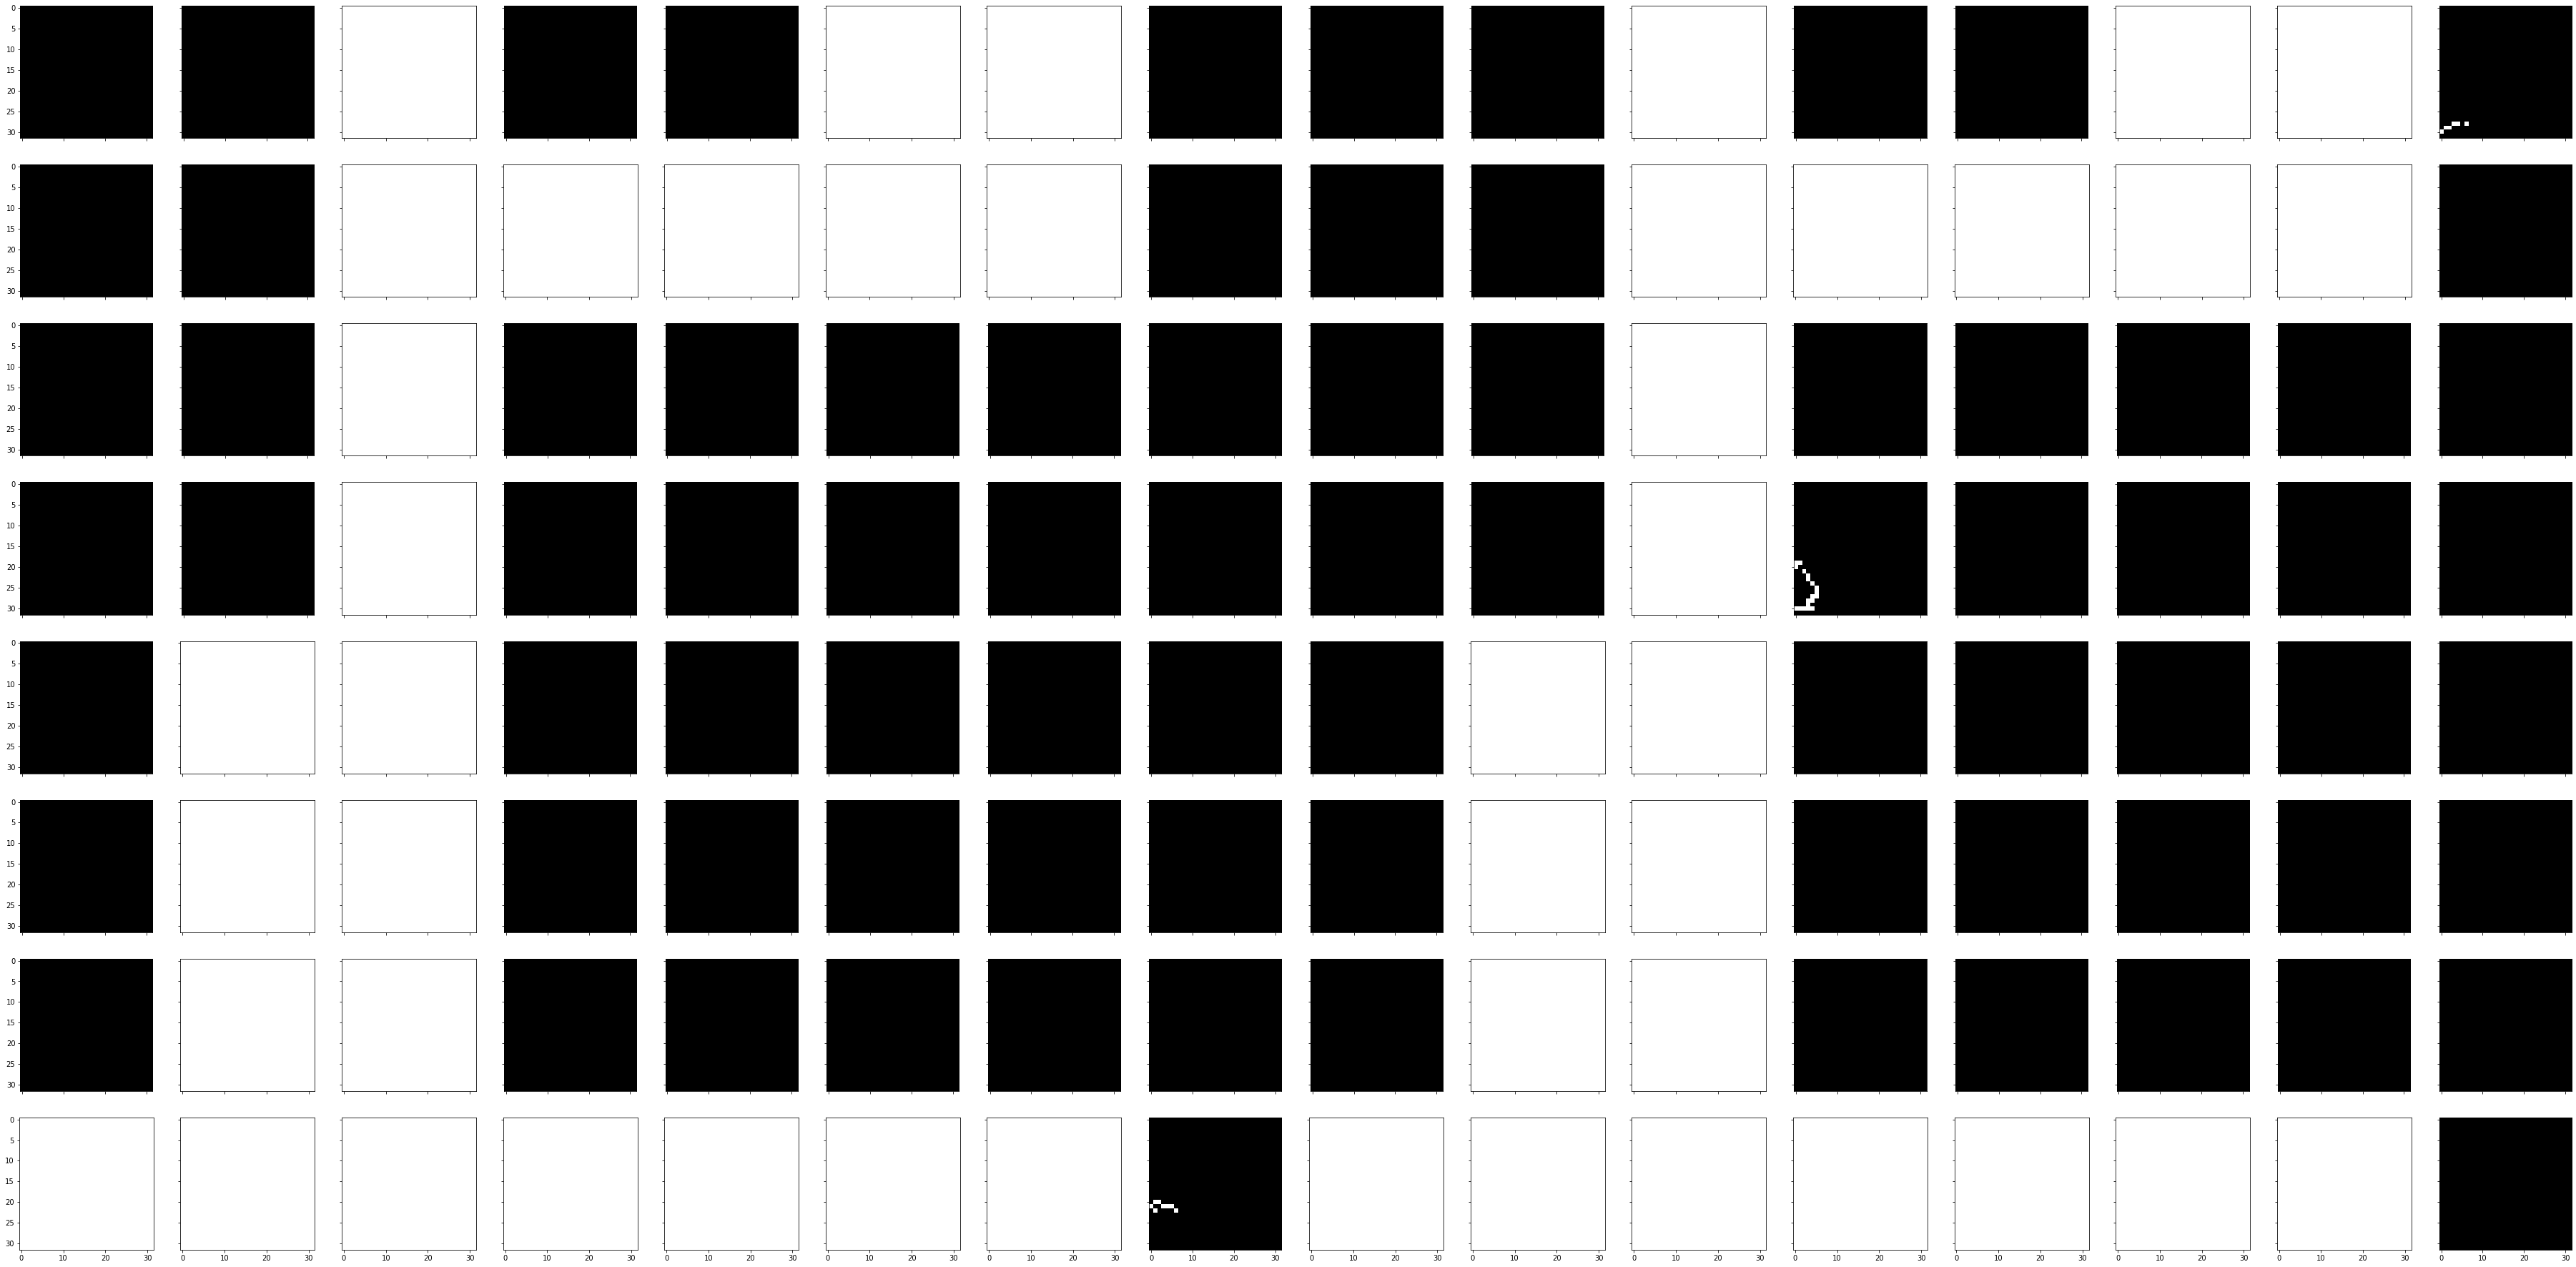

In [ ]:
plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range(n):
    i_image = np.array(cropped_images[4 * 64 + i])
    j_image = np.array(cropped_images[5 * 64 + i])

    concat_image = cv2.hconcat([i_image, j_image])
    value = model(concat_image.reshape(-1, CONCAT_HEIGHT * CONCAT_WIDTH))[0][0]
    if (value == 1):
        ax[i // 8][i % 8].imshow(i_image)
        ax[i // 8][i % 8 + 8].imshow(j_image)

result_name = (EXPERIMENT_DATA['name'] + '_'
    + EXPERIMENT_DATA['number'] + '_'
    + 'Reconstruction' + '('
    + EXPERIMENT_DATA['date'] + ')_2.png')
print( result_name )

plt.savefig(result_name, dpi = 100)
plt.show()

Trajectory_Clusetring_29_Reconstruction(07-11-2021)_2.png


<Figure size 432x288 with 0 Axes>

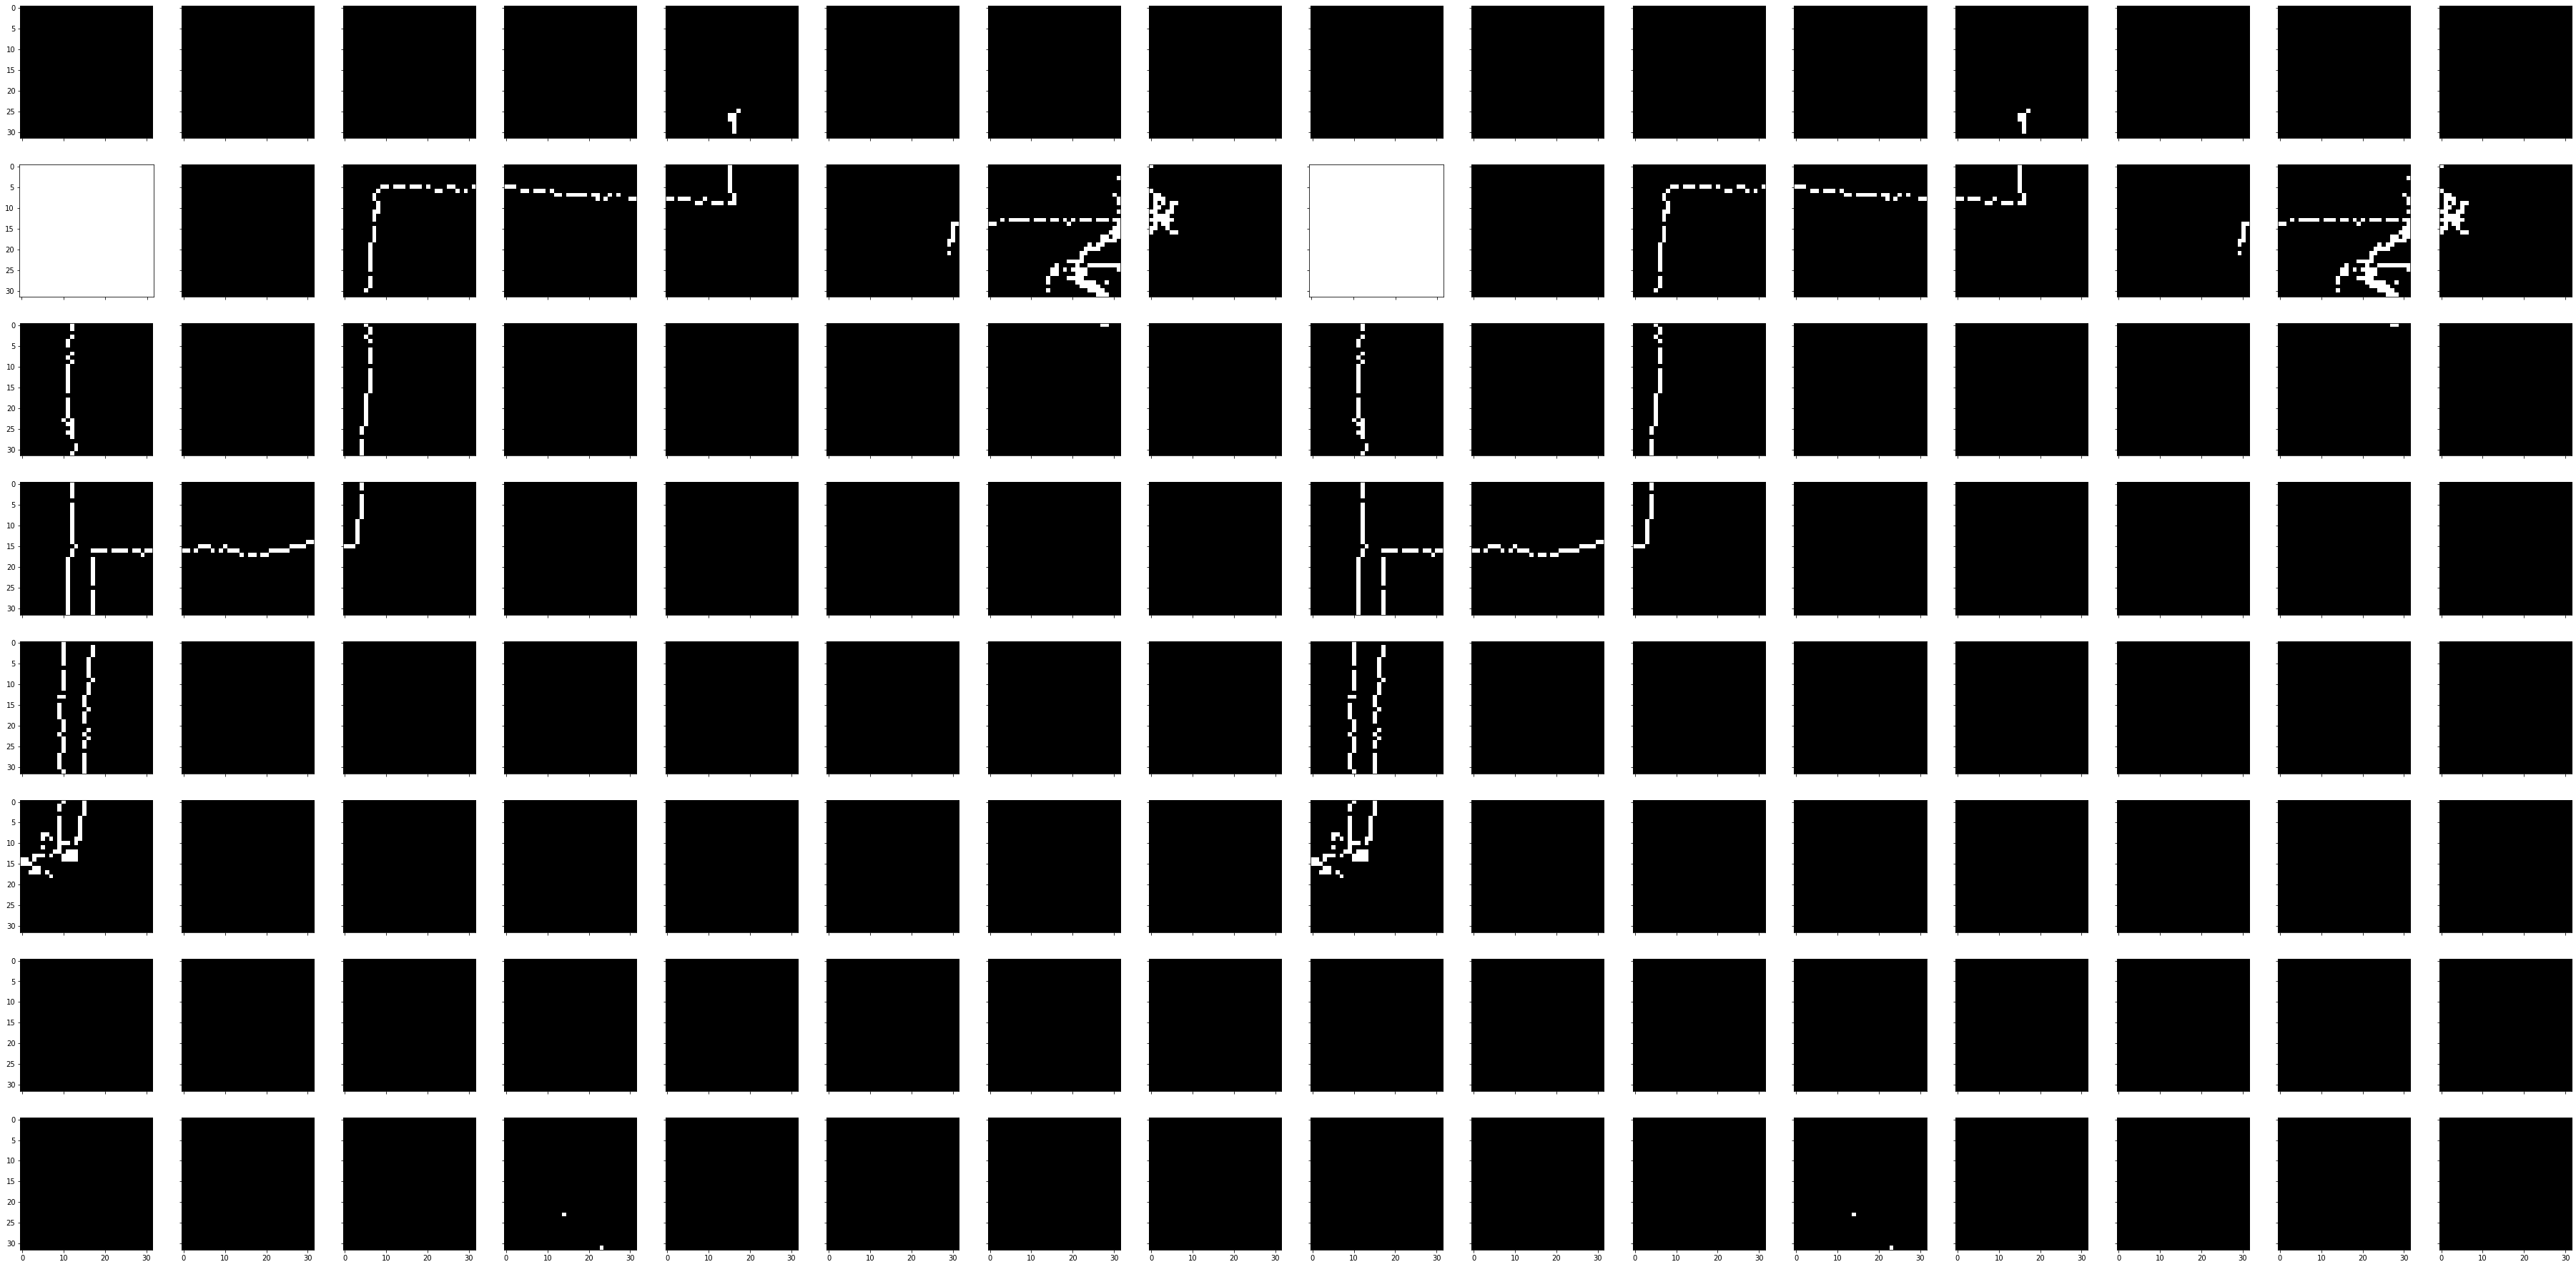

In [ ]:
plt.gray()

row, col = HEIGHT // CROP_HEIGHT, WIDTH // CROP_WIDTH
n = row * col
fig, ax = plt.subplots( row, 2 * col, True, True, figsize = ( 64, 32 ) )
for i in range(n):
    i_image = np.array(cropped_images[i])
    j_image = np.array(cropped_images[i])

    concat_image = cv2.hconcat([i_image, j_image])
    value = model(concat_image.reshape(-1, CONCAT_HEIGHT * CONCAT_WIDTH))[0][0]
    if (value == 1):
        ax[i // 8][i % 8].imshow(i_image)
        ax[i // 8][i % 8 + 8].imshow(j_image)

result_name = (EXPERIMENT_DATA['name'] + '_'
    + EXPERIMENT_DATA['number'] + '_'
    + 'Reconstruction' + '('
    + EXPERIMENT_DATA['date'] + ')_3.png')
print( result_name )

plt.savefig(result_name, dpi = 100)
plt.show()

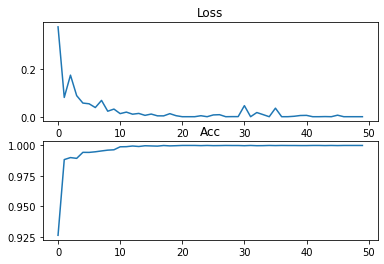

In [ ]:
os.chdir(CURR_RESULT_DIR)

model.save('model.h5')

fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'])
ax[0].set_title('Loss')

ax[1].plot(history.history['acc'])
ax[1].set_title('Acc')

plt.savefig('result' + '.png')
plt.show()